# Исследовательский анализ данных в Python и проверка гипотез.

## Анализ данных сервиса Яндекс Афиша 

- Автор: Артеменко Елена
- Дата: 1 июля 2025

## Цели и задачи проекта

**Цель проекта:**

1. изучить изменение пользовательской активности в связи с сезонностью.
2. проверить гипотезы относительно активности пользователей мобильных и стационарных устройств.

**Задачи проекта:**

1. Сбор и предобработка данных.
2. Анализ:

    2.1. распределения заказов по сегментам и их сезонных изменений;
    
    2.2. активности пользователей осенью 2024 года;
    
    2.3. популярных событий и партнёров.
    
3. Статистический анализ данных и проверка гипотез о поведении пользователей мобильных/стационарных устройств.
4. Интерпретация результатов и выводы.



## Описание данных

Для анализа предоставлены данные о бронировании билетов на сервисе Яндекс Афиша за период с 1 июня по 30 октября 2024 года.

**Датасет `final_tickets_orders_df.csv`** включает информацию обо всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных.

`order_id` — уникальный идентификатор заказа.

`user_id` — уникальный идентификатор пользователя.

`created_dt_msk` — дата создания заказа (московское время).

`created_ts_msk` — дата и время создания заказа (московское время).

`event_id` — идентификатор мероприятия из таблицы events.

`cinema_circuit` — сеть кинотеатров. Если не применимо, то здесь будет значение 'нет'.

`age_limit` — возрастное ограничение мероприятия.

`currency_code` — валюта оплаты, например rub для российских рублей.

`device_type_canonical` — тип устройства, с которого был оформлен заказ, например mobile для мобильных устройств, desktop для стационарных.

`revenue` — выручка от заказа.

`service_name` — название билетного оператора.

`tickets_count` — количество купленных билетов.

`total` — общая сумма заказа.

`days_since_prev` – количество дней с предыдущей покупки для каждого пользователя. Если покупки не было, то данные содержат пропуск.

**Датасет `final_tickets_events_df.csv`** содержит информацию о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия.

`event_id` — уникальный идентификатор мероприятия.

`event_name` — название мероприятия. Аналог поля event_name_code из исходной базы данных.

`event_type_description` — описание типа мероприятия.

`event_type_main` — основной тип мероприятия: театральная постановка, концерт и так далее.

`organizers` — организаторы мероприятия.

`region_name` — название региона.

`city_name` — название города.

`venue_id` — уникальный идентификатор площадки.

`venue_name` — название площадки.

`venue_address` — адрес площадки.

**Датасет `final_tickets_tenge_df.csv`** содержит информацию о курсе тенге к российскому рублю за 2024 год. Значения в рублях представлено для 100 тенге.

`nominal` — номинал (100 тенге).

`data` — дата.

`curs` — курс тенге к рублю.

`cdx` — обозначение валюты (kzt).


## Содержимое проекта

1. Сбор и предобработка данных.

    1.1. Загрузка и объединение данных и проверка на пропуски.
    
    1.2. Преобразование форматов.
    
    1.3. Создание дополнительных столбцов для анализа. 
    
    1.4. Проверка на явные и неявные дубликаты.
    
    1.5. Изучение статистик данных, оценка данных на выбросы, обработка.
    
    1.6. Создание дополнительных столбцов, необходимых для анализа. Приведение данных к единой валюте.
    
    
2. Исследовательский анализ данных.
    2.1. Анализ распределения заказов по сегментам и их сезонных изменений.
    * динамика заказов по месяцам.
    * cравнение лето/осень.
    * промежуточный вывод.
    
    2.2. Анализ активности пользователей осенью 2024 года.
    * динамика по дням.
    * недельная цикличность.
    * промежуточный вывод.
    
    2.3. Популярные события и партнёры.
    * анализ по регионам.
    * анализ по партнёрам.
    * промежуточный вывод.
    

3. Статистический анализ данных и проверка гипотезы.

    3.1. Проверка гипотезы о разнице среднего количества заказов на одного пользователя между мобильным приложением и стационарными устройствами.
    
    3.2. Проверка гипотезы о разницы среднего времени между заказами пользователей мобильного приложения и стационарных устройств.
    
    3.3. Промежуточный вывод: подтверждение / отклонение гипотез.
    

4. Общий вывод и рекомендации.

## Сбор и предобработка данных.
### Загрузка и объединение данных, проверка на пропуски.


In [1]:
#импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

In [2]:
#загружаем и просматриваем данные датасета с заказами
final_tickets_orders = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_orders_df.csv')
final_tickets_orders.head(5)

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


In [3]:
#смотрим пропуски
final_tickets_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

✅ Датасет содержит 14 столбцов и 290849 строк. Пропуски содержит только поле `days_since_prev`, что является органическим: у части пользователей может не быть предыдущих заказов. 

In [4]:
#загружаем и просматриваем данные датасета с событиями
final_tickets_events = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_events_df.csv')
final_tickets_events.head(5)

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


In [5]:
#смотрим пропуски
final_tickets_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


✅ Датасет содержит 11 столбцов и 22427 строк. Пропусков нет. 

In [6]:
#загружаем и просматриваем данные датасета с курсом валют
final_tickets_tenge = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')
final_tickets_tenge.head(5)

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


In [7]:
#смотрим пропуски
final_tickets_tenge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


✅ Датасет содержит 4 столбца и 357 строк. Пропусков нет.

Так как для дальнейшей работы нам понадобится объединенный датасет, а также валюта билетов должна быть переведена в рубли, произведем сразу объединение данных. Предобработку сделаем на объединенном датасете. 

In [8]:
#объединяем датасеты с заказами и мероприятиями 
final_all_1 = pd.merge(final_tickets_orders, final_tickets_events, how='left', on='event_id')

In [9]:
#присоединим датасета с курсом тенге к рублю
final_all = pd.merge(final_all_1, final_tickets_tenge, how='left', left_on='created_dt_msk', right_on='data')

In [10]:
#просмотрим итоговый датасет
final_all.head(5)

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,region_name,city_name,city_id,venue_id,venue_name,venue_address,data,nominal,curs,cdx
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-08-20,100,18.6972,kzt
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",2024-07-23,100,18.3419,kzt
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",2024-10-06,100,19.6475,kzt
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,Североярская область,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",2024-07-13,100,18.5010,kzt
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",2024-10-04,100,19.6648,kzt


✅ Данные объединены, можно проводить предобработку.

### Преобразование форматов.


In [11]:
#проверяем типы данных
final_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290849 entries, 0 to 290848
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                290849 non-null  int64  
 1   user_id                 290849 non-null  object 
 2   created_dt_msk          290849 non-null  object 
 3   created_ts_msk          290849 non-null  object 
 4   event_id                290849 non-null  int64  
 5   cinema_circuit          290849 non-null  object 
 6   age_limit               290849 non-null  int64  
 7   currency_code           290849 non-null  object 
 8   device_type_canonical   290849 non-null  object 
 9   revenue                 290849 non-null  float64
 10  service_name            290849 non-null  object 
 11  tickets_count           290849 non-null  int64  
 12  total                   290849 non-null  float64
 13  days_since_prev         268909 non-null  float64
 14  event_name          

**Итоговый датасет содержит 29 столбцов и и 290849 строк.**

Значительная доля пропусков (7,5%) есть только в столбце `days_since_prev`, что является органическим: у покупателя может не быть предыдущих покупок. Заменять на 0 в данном случае некорректно, так как данные уже содержат нули, которые означают, что повторная покупка была совершена в тот же день. Поэтому оставим эти пропуски как есть.

Также у части данных (менее 1%) после объединения отсутствует детальная информация о мероприятиях (название, город и тд), но так как этих пропусков очень мало, то никак обрабатывать их не будем.

По типам данным: в целом, столбцы имеют корректные типы данных, с которыми можно работать, но для корректности и оптимизации можно: 

* привести `created_dt_msk`и `created_dt_msk` к типам даты и времени,
* понизить разрядность у полей `age_limit`, `tickets_count`, `nominal`.

In [12]:
#преобразуем форматы 

final_all['created_dt_msk'] = pd.to_datetime(final_all['created_dt_msk'])
final_all['created_ts_msk'] = pd.to_datetime(final_all['created_ts_msk'])

final_all['age_limit'] = final_all['age_limit'].astype('int8')
final_all['tickets_count'] = final_all['tickets_count'].astype('int8')
final_all['nominal'] = final_all['nominal'].astype('int8')


In [13]:
#проверка преобразования
final_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290849 entries, 0 to 290848
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                290849 non-null  int64         
 1   user_id                 290849 non-null  object        
 2   created_dt_msk          290849 non-null  datetime64[ns]
 3   created_ts_msk          290849 non-null  datetime64[ns]
 4   event_id                290849 non-null  int64         
 5   cinema_circuit          290849 non-null  object        
 6   age_limit               290849 non-null  int8          
 7   currency_code           290849 non-null  object        
 8   device_type_canonical   290849 non-null  object        
 9   revenue                 290849 non-null  float64       
 10  service_name            290849 non-null  object        
 11  tickets_count           290849 non-null  int8          
 12  total                   290849

###  Создание дополнительных столбцов для анализа. 


Далее создадим нужные для анализа и дальнейшей работы столбцы. 

In [14]:
#создаем столбец revenue_rub (выручка с заказа в рублях)
#напишем функцию, которая будет переводить тенге в рубли по соответствующему курсу 
def convert_currency(row):
    if row['currency_code'] == row['cdx']:
        return round(row['revenue'] / row['nominal'] * row['curs'], 2)
    else:
        return row['revenue']

#применяем построчно к нашему датасету
final_all['revenue_rub'] = final_all.apply(convert_currency, axis=1)

In [15]:
#создаем столбец one_ticket_revenue_rub (выручка с продажи одного билета)
final_all['one_ticket_revenue_rub'] = round(final_all['revenue_rub'] / final_all['tickets_count'],2)

In [16]:
#создаем столбец month (месяц оформления заказа)
final_all['month'] = final_all['created_dt_msk'].dt.month

In [17]:
#создаем столбец season (категории сезонности)
#напишем функцию, которая будет определять сезон в зависимости от номера месяца 
def seasons(row):
    if 3 <= row['month'] <= 5:
        return "весна"
    elif 6 <= row['month'] <= 8:
        return "лето"
    elif 9 <= row['month'] <= 11:
        return "осень"
    else:
        return "зима"
#применяем построчно к нашему датасету   
final_all['season'] = final_all.apply(seasons, axis=1)

In [18]:
#проверим результат
final_all.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,venue_name,venue_address,data,nominal,curs,cdx,revenue_rub,one_ticket_revenue_rub,month,season
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-08-20,100,18.6972,kzt,1521.94,380.48,8,лето
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",2024-07-23,100,18.3419,kzt,289.45,144.72,7,лето
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",2024-10-06,100,19.6475,kzt,1258.57,314.64,10,осень
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",2024-07-13,100,18.5010,kzt,8.49,4.24,7,лето
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",2024-10-04,100,19.6648,kzt,1390.41,463.47,10,осень


✅ Дополнительные столбцы созданы и добавлены в датасет.

### Проверка на явные и неявные дубликаты.


Теперь проверим значения категориальных полей датасета, нет ли там неявных дубликатов. 

In [19]:
#проверяем уникальные значения в поле с сетями кинотеатров
final_all['cinema_circuit'].unique()

array(['нет', 'Другое', 'Киномакс', 'КиноСити', 'Москино', 'ЦентрФильм'],
      dtype=object)

In [20]:
#посмотрим на распределение по категориям
final_all['cinema_circuit'].value_counts()

нет           289451
Другое          1261
КиноСити         122
Москино            7
Киномакс           7
ЦентрФильм         1
Name: cinema_circuit, dtype: int64

⚠️ В поле с названиями сети кинотеатров, помимо названий, есть значения: `нет` и `Другое`. 
Наличие значения `нет` корректно, так как не ко всем мероприятиям применим параметр сети кинотеатров. А вот значение `Другое` составляет 90% оставшихся данных, что делает анализ по сетям кинотеатров затруднительным. Просто учтем это на случай, если нам понадобится этот столбец для анализа. 

In [21]:
#проверяем уникальные значения в поле с валютой
final_all['currency_code'].unique()

array(['rub', 'kzt'], dtype=object)

✅ В поле с валютой две категории: рубли и тенге.

In [22]:
#проверяем уникальные значения в поле с типами устройств
final_all['device_type_canonical'].unique()


array(['mobile', 'desktop'], dtype=object)

✅ В поле с типом устройств две категории: мобильные и десктоп.

In [23]:
#проверяем уникальные значения в поле с названием сервиса (плюс сортировка)
sorted(final_all['service_name'].unique())


['Crazy ticket!',
 'Show_ticket',
 'Билет по телефону',
 'Билеты без проблем',
 'Билеты в интернете',
 'Билеты в руки',
 'Быстробилет',
 'Быстрый кассир',
 'Весь в билетах',
 'Восьмёрка',
 'Вперёд!',
 'Выступления.ру',
 'Городской дом культуры',
 'Дом культуры',
 'Дырокол',
 'За билетом!',
 'Зе Бест!',
 'КарандашРУ',
 'Кино билет',
 'Край билетов',
 'Лимоны',
 'Лови билет!',
 'Лучшие билеты',
 'Мир касс',
 'Мой билет',
 'Облачко',
 'Прачечная',
 'Радио ticket',
 'Реестр',
 'Росбилет',
 'Тебе билет!',
 'Телебилет',
 'Тех билет',
 'Цвет и билет',
 'Шоу начинается!',
 'Яблоко']

✅ В поле с названием сервисов продажи билетов неявных дубликатов с похожими названиями не найдено.

In [24]:
#проверяем уникальные значения в поле с описанием мероприятий (плюс сортировка и удаление пропусков)
sorted (final_all['event_type_description'].dropna().unique())


['балет',
 'выставка',
 'концерт',
 'кукольный спектакль',
 'музыкальный спектакль',
 'мюзикл',
 'опера',
 'оперетта',
 'подарок',
 'рок-мюзикл',
 'снегурочка',
 'событие',
 'спектакль',
 'спорт',
 'спортивное мероприятие',
 'фестиваль',
 'цирковое шоу',
 'шоу',
 'экскурсия',
 'ёлка']

⚠️ В поле с описанием события обнаружены неявные дубликаты: спорт и спортивное мероприятие. Заменим их на общее название `спортивное мероприятие`.
Также есть вопросы к категориям: снегурочка и ёлка, но здесь есть сомнения в том, что это дубликаты, лучше уточнить этот вопрос у заказчика. 

In [25]:
#меняем название категорий
final_all['event_type_description'] = final_all['event_type_description'].replace({'спорт': 'спортивное мероприятие'})


In [26]:
#проверяем уникальные значения в поле с типом мероприятий (плюс сортировка и удаление пропусков)
sorted(final_all['event_type_main'].dropna().unique())


['выставки', 'другое', 'концерты', 'спорт', 'стендап', 'театр', 'ёлки']

✅ В поле с типом мероприятия неявных дубликатов нет. 


In [27]:
#проверяем уникальные значения в поле с регионами (плюс сортировка и удаление пропусков)
sorted(final_all['region_name'].dropna().unique())


['Белоярская область',
 'Берестовский округ',
 'Берёзовская область',
 'Боровлянский край',
 'Верховинская область',
 'Верхозёрский край',
 'Верхоречная область',
 'Ветренский регион',
 'Вишнёвский край',
 'Глиногорская область',
 'Голубевский округ',
 'Горицветская область',
 'Горноземский регион',
 'Горностепной регион',
 'Дальнеземская область',
 'Дальнезорский край',
 'Дубравная область',
 'Залесский край',
 'Заречная область',
 'Зеленоградский округ',
 'Златопольский округ',
 'Золотоключевской край',
 'Зоринский регион',
 'Каменевский регион',
 'Каменичская область',
 'Каменноозёрный край',
 'Каменноярский край',
 'Каменополянский округ',
 'Ключеводский округ',
 'Кристаловская область',
 'Кристальная область',
 'Крутоводская область',
 'Крутоводский регион',
 'Лесноярский край',
 'Лесодальний край',
 'Лесополянская область',
 'Лесостепной край',
 'Лесоярская область',
 'Луговая область',
 'Лугоградская область',
 'Малиновая область',
 'Малиновоярский округ',
 'Медовская область',


⚠️ Обнаружены два неявных дубликата: Речицкая область/Речицкий регион и Крутоводская область/Крутоводский регион. Так как названия вымышленные, то подтвердить на 100% не получится, но все равно посчитаем эти названия неявными дубликатами и заменим на одно. 

In [28]:
final_all['region_name'] = final_all['region_name'].replace({'Речицкий регион': 'Речицкая область'})
final_all['region_name'] = final_all['region_name'].replace({'Крутоводский регион': 'Крутоводская область'})


Оставшиеся столбцы (такие как `city_name`, `venue_name`, `venue_address`) уже не являются категориальными, да и для анализа там не понадобятся, поэтому проверять неявные дубликаты в них не будем. 

Теперь проверим на явные дубликаты.

In [29]:
final_all.duplicated().sum()

0

✅ Явных дубликатов не обнаружено. 

Однако, помимо явных и неявных (в названиях категориальных полей) дубликатов, может присутствовать еще один тип дубликатов: когда данные о билетах задублировались, но по какой-то причине им присвоены разные order_id. То есть в таких строках совпадают все данные, кроме order_id. Проверим датасет на такие дубликаты:

In [30]:
final_all.duplicated(subset=final_all.columns.difference(['order_id']), keep=False).sum()

58

⚠️ Обнаружено 58 скрытых дубликатов. Удалим их, оставив только одно вхождение. 

In [31]:
final_all_clean = final_all.drop_duplicates(subset=final_all.columns.difference(['order_id']),keep='first')

In [32]:
final_all_clean.shape

(290819, 32)

Продолжим предобработку изучением количественных данных. 

###    Изучение количественных данных, оценка данных на выбросы, обработка.


Для анализа данных важными показателями являются **выручка с заказа revenue** и **количество билетов в заказе tickets_count**, поэтому проверим данные в этих столбцах. И так как мы уже провели преобразование данных в рубли, то анализировать будем поля `revenue_rub` и `tickets_count`.

In [33]:
#посмотрим описательную статистику по выручке
final_all_clean['revenue_rub'].describe()

count    290819.000000
mean        555.150649
std         875.309591
min         -90.760000
25%         113.400000
50%         350.330000
75%         802.050000
max       81174.540000
Name: revenue_rub, dtype: float64

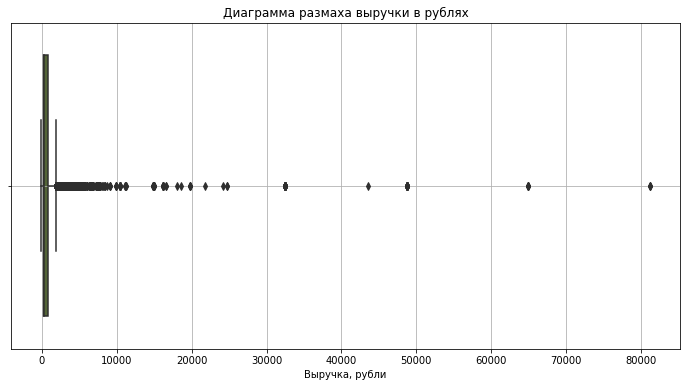

In [34]:
#визуализируем распределение выручки с помощью диаграммы размаха
plt.figure(figsize=(12, 6))
sns.boxplot(x=final_all_clean['revenue_rub'], color='#556B2F')

plt.title('Диаграмма размаха выручки в рублях')
plt.xlabel('Выручка, рубли')
plt.grid(True)
plt.show()

⚠️ Данные по выручке (в рублях): 

* содержат отрицательные значения (возможно, возвраты билетов) 
* содержат выбросы, среднее значение и медиана существенно отличаются (среднее 555 руб., медиана 350 руб., а стандартное отклонение 875 говорит о большом разбросе данных)
* диапазон распределения данных: от -91 руб. до 81175 руб. 

Разделим выручку на положительные и отрицательные значения, чтобы оценить размер этих групп. 

In [35]:
revenue_negative = final_all[final_all['revenue_rub'] < 0]['revenue_rub'].sum()
revenue_positive = final_all[final_all['revenue_rub'] > 0]['revenue_rub'].sum()

print (f'Возвратов: {revenue_negative} руб. , купленных билетов: {revenue_positive:.2f} руб.')

Возвратов: -949.59 руб. , купленных билетов: 161459365.83 руб.


Сумма возвратов ничтожно мала относительно общего объема выручки, поэтому можно эти данные отфильтровать. Также, отфильтруем данные по 99 процентилю, чтобы убрать выбросы с «правой» стороны. 
Но сначала изучим еще данные по количеству билетов в заказе.

In [36]:
#посмотрим описательную статистику по количеству билетов
final_all_clean['tickets_count'].describe()

count    290819.000000
mean          2.754256
std           1.170461
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          57.000000
Name: tickets_count, dtype: float64

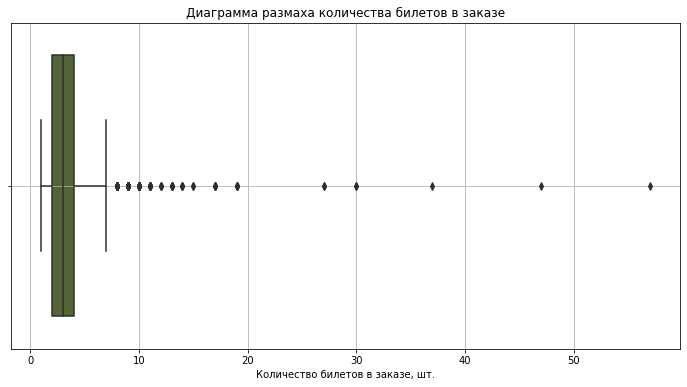

In [37]:
#визуализируем распределение количества билетов с помощью диаграммы размаха
plt.figure(figsize=(12, 6))
sns.boxplot(x=final_all_clean['tickets_count'],color='#556B2F')

plt.title('Диаграмма размаха количества билетов в заказе')
plt.xlabel('Количество билетов в заказе, шт.')
plt.grid(True)
plt.show()

⚠️ Среднее количество билетов – 2.75, медиана – 3, стандартное отклонение небольшое (1.17), значит, разброс не слишком сильный.
Но максимум 57 билетов за раз — это аномально высокое значение, возможно, массовая закупка или ошибка.
75-й процентиль равен 4, следовательно, 57 — это явный выброс по сравнению с основной массой данных.
Эти данные также отфильтруем по 99-му процентилю. 

In [38]:
#считаем 99-й процентиль по выручке
revenue_q99 = final_all_clean['revenue_rub'].quantile(0.99)
#считаем 99-й процентиль по количеству билетов
tickets_count_q99 = final_all_clean['tickets_count'].quantile(0.99)

#фильтруем данные, оставляя выручку больше 0 и меньше 99-го процентиля и количество билетов меньше 99-го процентиля включительно
final_filtered = final_all_clean[
    (final_all_clean['revenue_rub'] > 0) & 
    (final_all_clean['revenue_rub'] <= revenue_q99) &
    (final_all_clean['tickets_count'] <= tickets_count_q99)
]

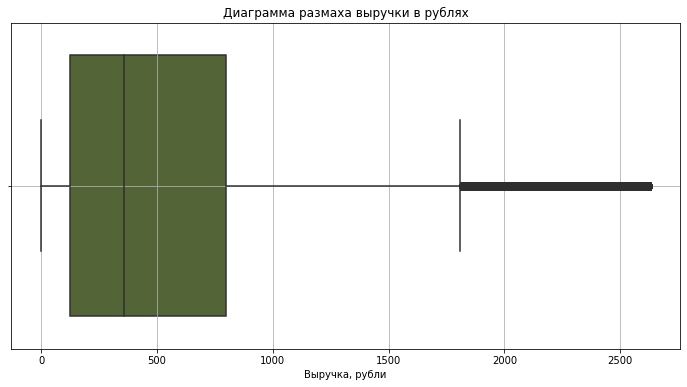

In [39]:
#визуализируем результат фильтрации: распределение выручки на диаграмме размаха
plt.figure(figsize=(12, 6))
sns.boxplot(x=final_filtered['revenue_rub'],color='#556B2F')

plt.title('Диаграмма размаха выручки в рублях')
plt.xlabel('Выручка, рубли')
plt.grid(True)
plt.show()

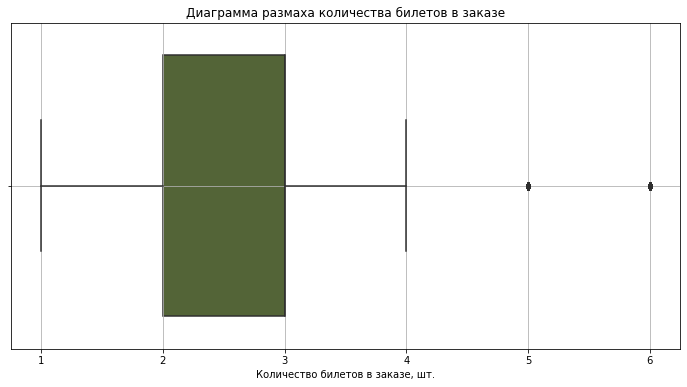

In [40]:
#визуализируем результат фильтрации: распределение количества билетов на диаграмме размаха
plt.figure(figsize=(12, 6))
sns.boxplot(x=final_filtered['tickets_count'], color='#556B2F')

plt.title('Диаграмма размаха количества билетов в заказе')
plt.xlabel('Количество билетов в заказе, шт.')
plt.grid(True)
plt.show()

In [41]:
print(f"Всего строк: {len(final_all)}, после фильтрации осталось: {len(final_filtered)} ({len(final_filtered) / len(final_all) * 100:.2f}%)")

Всего строк: 290849, после фильтрации осталось: 281703 (96.86%)


После удаления дубликатов и фильтрации выбросов датасет стал содержать 281703 заполненных строк (отфильтровано 3,14% данных).
Итого, в процессе предобработки:

* данные объединены в один датасет, 
* все данные приведены к единой валюте RUB (в соответствии с курсом тенге),
* созданы дополнительные столбцы для анализа: `one_ticket_revenue_rub`, `month`, `season`,
* преобразованы форматы данных (приведены к типу дата-время, снижена размерность),
* проверены и оценены пропуски в данных, 
* проверены и исправлены неявные дубликаты в категориальных данных,
* проверены явные и скрытые дубликаты (удалены),
* количественные данные проверены на выбросы и отфильтрованы. 


## Исследовательский анализ данных.

### Анализ распределения заказов по сегментам и их сезонных изменений.

💬 Для каждого месяца найдите количество заказов и визуализируйте результаты. Проверьте, фиксируется ли увеличение заказов от июня к ноябрю 2024 года.

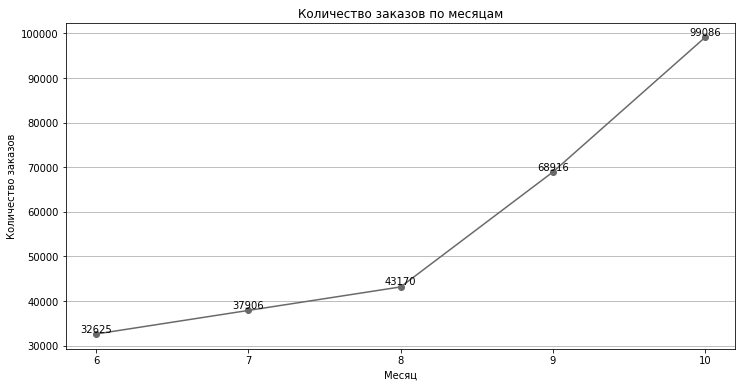

In [42]:
#группируем заказы по месяцам
orders_per_month = final_filtered.groupby('month')['order_id'].count()

#строим линейный график
plt.figure(figsize=(12, 6))
plt.plot(orders_per_month.index, orders_per_month.values, color='#696969', marker = 'o')
plt.title('Количество заказов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.grid(axis='y')
plt.xticks(range(6, 11)) 
for i, v in enumerate(orders_per_month.values):
    plt.text(orders_per_month.index[i], v, str(v), ha='center', va='bottom')
plt.show()

Количество заказов растет от июня к октябрю 2024. В осенние месяцы количество заказов кратно отличается от летних.

💬 Для осеннего и летнего периодов сравните распределение заказов билетов по разным категориям: тип мероприятия, тип устройства, категория мероприятия по возрастному рейтингу.

In [43]:
#cоздаем сводную таблицу с количеством заказов, сгруппированным по типу мероприятия и сезону
orders_per_event_season = final_filtered.pivot_table(
    index='event_type_main',
    columns='season',
    values='order_id',
    aggfunc='count'
)

#считаем доли каждого мероприятия
orders_per_event_season_percent = round(orders_per_event_season.divide(orders_per_event_season.sum(axis=0), axis=1)*100,2).sort_values(by='лето', ascending=False)

#выводим таблицу на просмотр
display(orders_per_event_season_percent)


season,лето,осень
event_type_main,,
концерты,43.78,37.43
другое,25.00,19.40
театр,20.85,25.43
стендап,5.58,4.12
спорт,2.43,11.17
выставки,2.12,1.43
ёлки,0.24,1.01


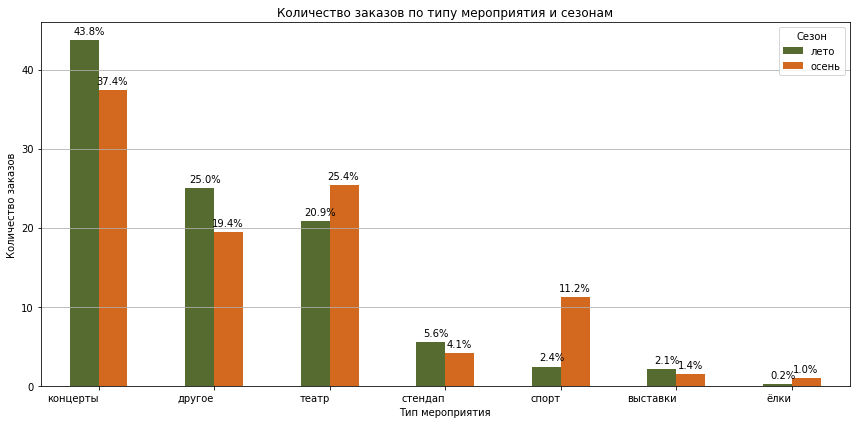

In [44]:
#задаем цветовую схему для диаграммы
colors = ['#556B2F', '#D2691E']
#строим гистограмму
ax = orders_per_event_season_percent.plot(kind='bar', figsize=(12, 6), color = colors)

#настройки графика
plt.title('Количество заказов по типу мероприятия и сезонам')
plt.xlabel('Тип мероприятия')
plt.ylabel('Количество заказов')
plt.legend(title='Сезон')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.grid(axis='y')

#подписи данных
for i, row in enumerate(orders_per_event_season_percent.values):
    for j, val in enumerate(row):
        ax.text(i + j*0.2 - 0.08, val + 0.5, f'{val:.1f}%', ha='center', va='bottom')

#просмотр 
plt.show()

🔻 **Снижение количества заказов осенью**

И в летний, и в осенний период **лидер среди мероприятий – концерты**. Однако, осенью продажи билетов на концерты снижаются относительно лета. 
На втором месте мероприятия из категории «Другое», которые также снижают активность осенью, как «Стендап» и «Выставки». 

🔺 **Увеличение количества заказов осенью**

«Театр», «Спорт», «Ёлки» становятся популярнее с наступлением осени, что связано с факторами сезонности (такими как начало театрального сезона осенью, подготовка к новогодним ёлкам). 


In [45]:
#cоздаем сводную таблицу с количеством заказов, сгруппированным по типу устройства и сезону
orders_per_device_season = final_filtered.pivot_table(
    index='device_type_canonical',
    columns='season',
    values='order_id',
    aggfunc='count'
)

#считаем доли каждого устройства
orders_per_device_season_percent = round(orders_per_device_season.divide(orders_per_device_season.sum(axis=0), axis=1)*100,2).sort_values(by='лето', ascending=False)

#выводим таблицу на просмотр
display(orders_per_device_season_percent)


season,лето,осень
device_type_canonical,,
mobile,80.95,79.62
desktop,19.05,20.38


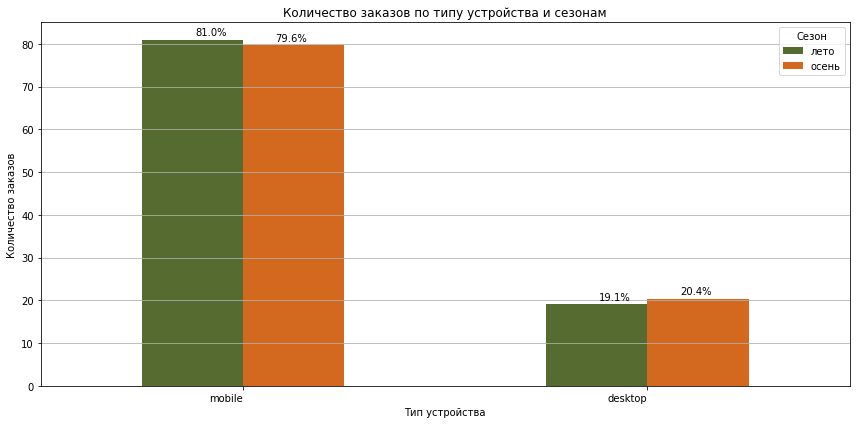

In [46]:
#строим гистограмму
ax1 = orders_per_device_season_percent.plot(kind='bar', figsize=(12, 6), color = colors)

#настройки графика
plt.title('Количество заказов по типу устройства и сезонам')
plt.xlabel('Тип устройства')
plt.ylabel('Количество заказов')
plt.legend(title='Сезон')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.grid(axis='y')

#подписи данных
for i, row in enumerate(orders_per_device_season_percent.values):
    for j, val in enumerate(row):
        ax1.text(i + j*0.2 - 0.08, val + 0.5, f'{val:.1f}%', ha='center', va='bottom')

#просмотр 
plt.show()

Осенью по сравнению с летом:

🔻 меньше заказывают с мобильных устройств

🔺 больше заказывают с десктопов

Однако, доли изменились всего на 0.4%, поэтому можно считать, что фактор сезонности (лето/осень) слабо связан с устройствами пользователей. 

In [47]:
#cоздаем сводную таблицу с количеством заказов, сгруппированным по возрастному лимиту и сезону
orders_per_age_season = final_filtered.pivot_table(
    index='age_limit',
    columns='season',
    values='order_id',
    aggfunc='count'
)

#считаем доли каждого возрастного лимита
orders_per_age_season_percent = round(orders_per_age_season.divide(orders_per_age_season.sum(axis=0), axis=1)*100,2).sort_values(by='лето', ascending=False)

#выводим таблицу на просмотр
display(orders_per_age_season_percent)

season,лето,осень
age_limit,,
16,28.49,26.32
12,21.03,22.17
6,18.45,17.72
0,18.16,23.37
18,13.87,10.42


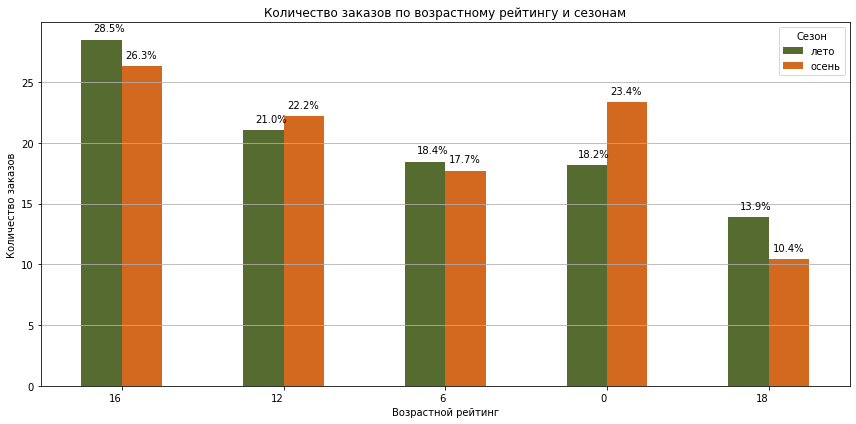

In [48]:
#строим гистограмму
ax2 = orders_per_age_season_percent.plot(kind='bar', figsize=(12, 6), color = colors)

#настройки графика
plt.title('Количество заказов по возрастному рейтингу и сезонам')
plt.xlabel('Возрастной рейтинг')
plt.ylabel('Количество заказов')
plt.legend(title='Сезон')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.grid(axis='y')

#подписи данных
for i, row in enumerate(orders_per_age_season_percent.values):
    for j, val in enumerate(row):
        ax2.text(i + j*0.2 - 0.08, val + 0.5, f'{val:.1f}%', ha='center', va='bottom')

#просмотр 
plt.show()

🔺 **Увеличение количества заказов осенью**

0+ мероприятия (для всех возрастов, часто детские) заметно увеличили долю выручки осенью — с 18.16% до 23.37%.

Небольшой рост 12+, и стабильность 6+ также говорит о фокусе на детские мероприятия в осенний период.


🔻 **Снижение количества заказов осенью**

Мероприятия 16+ и 18+ осенью снизили долю.


Осенью структура выручки смещается в сторону мероприятий для детей и семейной аудитории (0+, 6+, 12+), тогда как взрослые категории (16+, 18+) теряют долю. 

💬 Изучите изменение выручки с продажи одного билета в зависимости от типа мероприятия летом и осенью. Видна ли динамика средней стоимости билета в разрезе разных категорий мероприятий?

In [49]:
#cоздаем сводную таблицу с выручкой с продажи одного билета, сгруппированным по типу мероприятия и сезону
one_ticket_rev_per_event_season = final_filtered.pivot_table(
    index='event_type_main',
    columns='season',
    values='one_ticket_revenue_rub',
    aggfunc='mean'
).sort_values(by='лето', ascending=False)

#считаем относительное изменение (осень относительно лета) в процентах
change = ((one_ticket_rev_per_event_season['осень'] - one_ticket_rev_per_event_season['лето']) / 
                   one_ticket_rev_per_event_season['лето']) * 100


#добавляем столбец с относительным изменением к исходной сводной таблице
one_ticket_rev_per_event_season['change_%'] = change

#функция, которая форматирует относительное изменение в зависимости от значения (больше или меньше 0)
def color_change(val):
    if pd.isna(val):
        return ''
    color = 'green' if val > 0 else 'red' if val < 0 else 'black'
    return f'color: {color}'

#вывод на экран с форматированием
display(one_ticket_rev_per_event_season.style.applymap(color_change, subset=['change_%']).format({'change_%': '{:.2f}', 'лето': '{:.2f}', 'осень': '{:.2f}'}))


season,лето,осень,change_%
event_type_main,,,
концерты,307.11,269.41,-12.28
ёлки,271.44,230.29,-15.16
стендап,218.59,231.47,5.89
театр,216.66,176.35,-18.60
другое,87.98,77.37,-12.06
выставки,86.74,91.90,5.95
спорт,55.23,50.26,-9.00


Средняя цена билета (и выручка, соответственно) по большинству категорий осенью снижается, что может указывать на смещение спроса в сторону более доступных и дешевых форматов.
Стендап и выставки — исключения, показывающие рост выручки с билета.

*Примечание. Не удалось придумать более подходящей визуализации, чем таблица. Возможно, стоило построить сгруппированную гистрограмму (для стоимости билетов лето/осени), и дополнить ее линейным графиков с %динамикой. Но, честно говоря, в таблице данные воспринимаются проще.*

**Общий вывод по сезонным изменениям лето/осень 2024:**

* происходит перераспределение категорий мероприятий: осенью больше покупают билетов в театр и на спортивные мероприятия, тем самым снижая долю заказов в категориях с концертами, стендапами и прочими мероприятиями. 

* в сегменте устройств пользователей не наблюдается существенных сезонных изменений: пользователи покупают билеты с мобильных/десктопов примерно одинаково. 

* осенью происходит смещение в сторону семейных/детских мероприятий (в категориях 0+, 6+, 12+), а доля взрослых мероприятий снижается. 

* средняя цена билетов по большинству категорий осенью снижается, что возможно объясняется тем, что семейные мероприятия стоят дешевле (например, билеты в кино стоят дешевле билетов на концерт). 

### Анализ активности пользователей осенью 2024 года.

💬 Изучите активность пользователей осенью 2024 года.
Проанализируйте динамику изменений по дням для:

* общего числа заказов;
* количества активных пользователей DAU;
* среднего числа заказов на одного пользователя;
* средней стоимости одного билета.

In [50]:
#фильтруем данные для осеннего сезона
final_filtered_autumn = final_filtered[final_filtered['season'] == "осень"]

#создаем сводную таблицу с необходимыми показателями, переименовываем столбцы
autumn_activity_per_days = final_filtered_autumn.pivot_table(
    index='created_dt_msk',
    values=['order_id', 'user_id', 'total', 'one_ticket_revenue_rub'],
    aggfunc={
        'order_id': 'count',
        'user_id': 'nunique',
        'one_ticket_revenue_rub': 'mean'}).rename(columns={
    'order_id': 'orders',
    'user_id': 'unique_users',
    'one_ticket_revenue_rub': 'avg_one_ticket_revenue'})

#округляем до 2 знаков после запятой 
autumn_activity_per_days['avg_one_ticket_revenue'] = autumn_activity_per_days['avg_one_ticket_revenue'].round(2)

#добавляем столбец: среднее количество заказов на пользователя
autumn_activity_per_days['orders_per_user'] = round((autumn_activity_per_days['orders'] / autumn_activity_per_days['unique_users']),2)

#выводим результат
display(autumn_activity_per_days.head())



,avg_one_ticket_revenue,orders,unique_users,orders_per_user
created_dt_msk,,,,
2024-09-01,203.67,1318,556,2.37
2024-09-02,190.85,1370,571,2.40
2024-09-03,80.87,5091,776,6.56
2024-09-04,179.86,1758,683,2.57
2024-09-05,190.39,1937,739,2.62


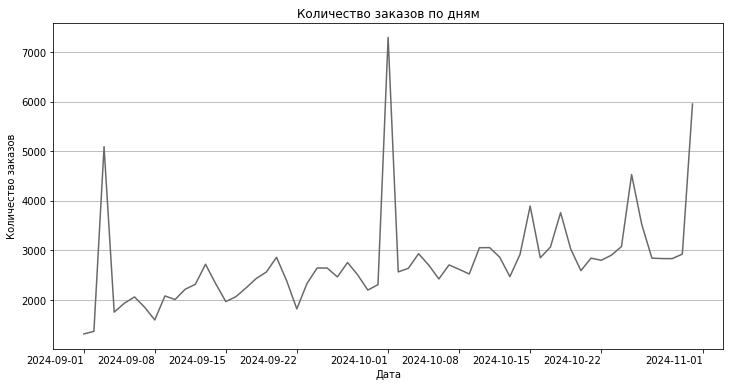

In [51]:
#построим линейный график: количество заказов по дням
plt.figure(figsize=(12, 6))
plt.plot(autumn_activity_per_days.index, autumn_activity_per_days['orders'], color='#696969')

plt.title('Количество заказов по дням')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.grid(axis='y')
plt.xticks(rotation=0, ha='right')

plt.show()


Количество заказов в течение осенних месяцев растет. В данных есть три пика, но в целом метрика показывает плавный рост от ~2000 до ~3000 заказов в день. 

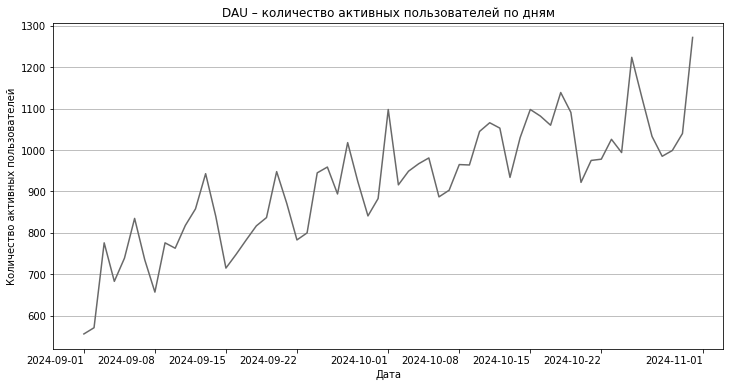

In [52]:
#построим линейный график: DAU
plt.figure(figsize=(12, 6))
plt.plot(autumn_activity_per_days.index, autumn_activity_per_days['unique_users'], color='#696969')

plt.title('DAU – количество активных пользователей по дням')
plt.xlabel('Дата')
plt.ylabel('Количество активных пользователей')
plt.grid(axis='y')
plt.xticks(rotation=0, ha='right')

plt.show()

Количество активных пользователей в день (DAU) выросло: c ~700 пользователей в начале сентября до ~1000-1200 в конце октября. Рост устойчивый, но показатель меняется скачкообразно. 

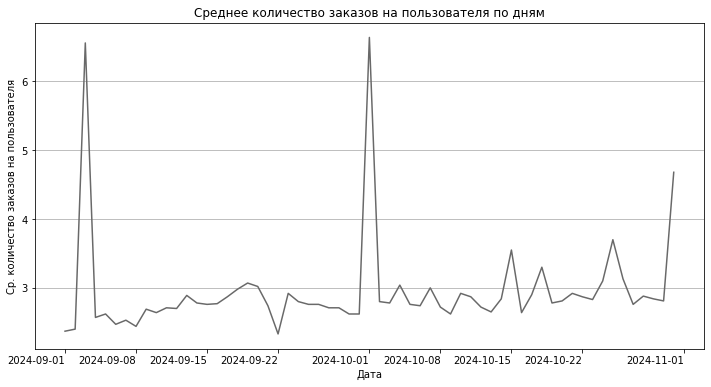

In [53]:
#построим линейный график: среднее число заказов на пользователя
plt.figure(figsize=(12, 6))
plt.plot(autumn_activity_per_days.index, autumn_activity_per_days['orders_per_user'], color='#696969')

plt.title('Среднее количество заказов на пользователя по дням')
plt.xlabel('Дата')
plt.ylabel('Ср. количество заказов на пользователя')
plt.grid(axis='y')
plt.xticks(rotation=0, ha='right')

plt.show()

Метрика среднего количество заказов пользователя в течение всего осеннего периода колеблется вокруг значения 3. Данные содержат три аномальных пика, но в остальном всё стабильно, с небольшим увеличением к концу периода.

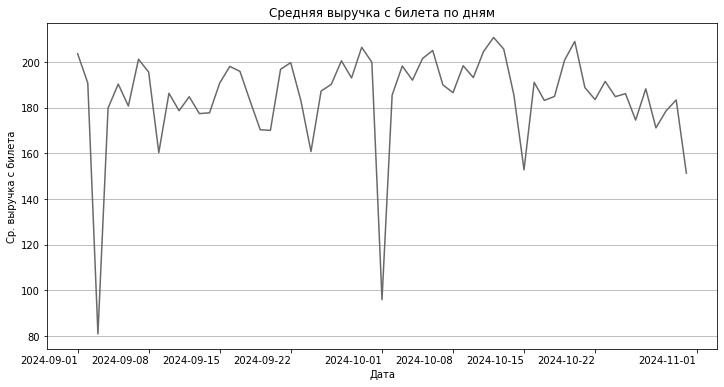

In [54]:
#построим линейный график: средняя стоимость билета
plt.figure(figsize=(12, 6))
plt.plot(autumn_activity_per_days.index, autumn_activity_per_days['avg_one_ticket_revenue'], color='#696969')

plt.title('Средняя выручка с билета по дням')
plt.xlabel('Дата')
plt.ylabel('Ср. выручка с билета')
plt.grid(axis='y')
plt.xticks(rotation=0, ha='right')

plt.show()

При этом метрика средняя выручка с билета по дням демонстрирует динамику, обратную количеству заказов пользователей. Данные также содержат три аномальных пика в те же даты, но в минус. Возможно, в эти дни была какая-то акция на покупку билетов. Значения колеблются вокруг 180-200 рублей с небольшим уменьшением к концу периода. 
Больше заказов ≠ больше выручка на билет.

💬 Изучите недельную цикличность. Выделите день недели и сравните пользовательскую активность в будни и выходные.

Пользовательская активность может быть охарактеризована двумя метриками: количество заказов и количество активных пользователей, посмотрим обе. 

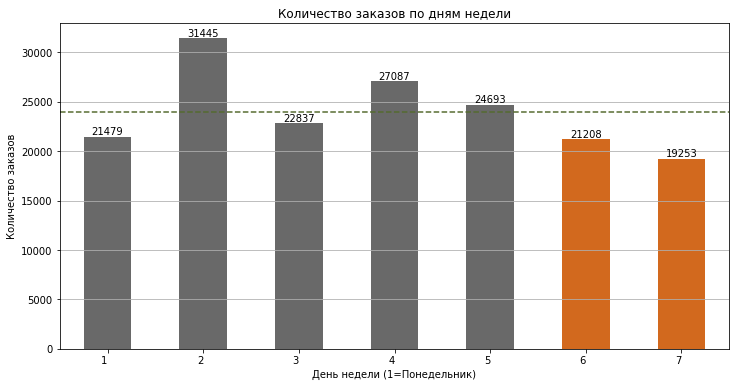

In [55]:
#добавим столбец с номером дня недели, начиная с 1 (понедельник)
final_filtered_autumn = final_filtered_autumn.copy()
final_filtered_autumn['day_name'] = final_filtered_autumn['created_dt_msk'].dt.weekday + 1

#посчитаем количество заказов по дням недели
orders_per_day_of_week = final_filtered_autumn.groupby('day_name')['order_id'].count()

#напишем функцию, которая будет окрашивать на диаграмме столбцы с буднями/выходными в разные цвета
def color_dayweek(val):
    if val == 6 or val == 7:
        color = '#D2691E'  
    else:
        color = '#696969' 
    return color

#создадим цветовую схему для диаграммы, применив пользовательскую функцию color_dayweek
colors2 = [color_dayweek(day) for day in orders_per_day_of_week.index]

#строим столбчатую диаграмму
ax = orders_per_day_of_week.plot(kind='bar', figsize=(12, 6), color=colors2)

#добавляем линию со средним значением заказов
mean_orders = orders_per_day_of_week.mean()
ax.axhline(mean_orders, color='#556B2F', linestyle='--', label=f'Среднее: {mean_orders:.1f}')

#добавляем подписи над столбцами
for i, val in enumerate(orders_per_day_of_week.values):
    ax.text(i, val + 0.5, str(val), ha='center', va='bottom')

#настраиваем и выводим диаграмму
plt.title('Количество заказов по дням недели')
plt.xlabel('День недели (1=Понедельник)')
plt.ylabel('Количество заказов')
plt.xticks(rotation=0, ha='right')
plt.grid(axis='y')

plt.show()



Самое высокое количество заказов – во вторник. 

Самое низкое – в воскресенье. 

Среднее количество заказов находится на уровне ~24 000. Во вторник, четверг и пятницу заказывают больше среднего, в остальные дни – меньше. 

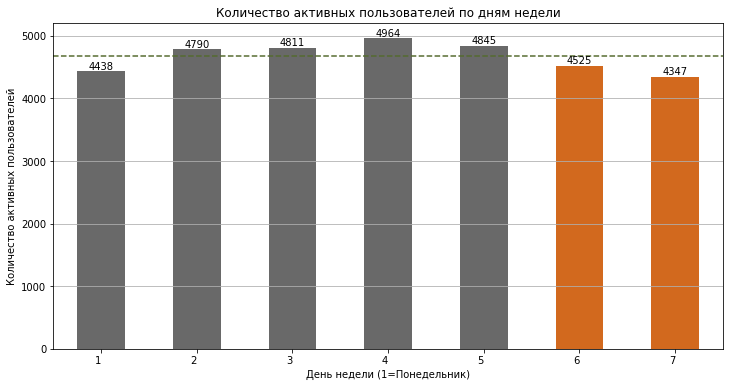

In [56]:
#посчитаем количество активных пользователей по дням недели
users_per_day_of_week = final_filtered_autumn.groupby('day_name')['user_id'].nunique()

#строим столбчатую диаграмму
ax2 = users_per_day_of_week.plot(kind='bar', figsize=(12, 6), color=colors2)

#добавляем линию со средним значением заказов
mean_users = users_per_day_of_week.mean()
ax2.axhline(mean_users, color='#556B2F', linestyle='--', label=f'Среднее: {mean_users:.1f}')

#добавляем подписи над столбцами
for i, val in enumerate(users_per_day_of_week.values):
    ax2.text(i, val + 0.5, str(val), ha='center', va='bottom')

#настраиваем и выводим диаграмму
plt.title('Количество активных пользователей по дням недели')
plt.xlabel('День недели (1=Понедельник)')
plt.ylabel('Количество активных пользователей')
plt.xticks(rotation=0, ha='right')
plt.grid(axis='y')

plt.show()

Самое высокое количество активных пользователей – во четверг.

Самое низкое – в воскресенье.

Среднее количество активных пользователей находится на уровне ~4 700. Во вторник, среду, четверг и пятницу заказывают больше среднего, в остальные дни – меньше.

**Общий вывод по осенней активности пользователей**

Осенний сезон 2024 года характеризуется устойчивым ростом пользовательской активности на платформе:

* Количество заказов стабильно растёт — с ~2000 до ~3000 заказов в день.

* Количество активных пользователей (DAU) увеличилось почти вдвое: с ~700 в начале сентября до ~1000-1200 в конце октября. 

* Среднее число заказов на одного пользователя сохраняется на уровне около 3, с небольшим ростом к концу периода. 

* Средняя выручка с билета, в целом стабильна, но демонстрирует небольшую нисходящую динамику. На те же даты, когда наблюдаются пики заказов, приходятся и минимумы по выручке на билет — вероятно, это связано с акциями или скидками.

Недельная цикличность:

* Активность пользователей по дням недели распределяется неравномерно.

* Максимум заказов и активных пользователей приходится на будние дни, минимум — на выходные. Это указывает на ярко выраженную цикличность: в будни (особенно в середине недели) пользователи более активны, чем в выходные.



### Популярные события и партнёры.

💬 Для каждого региона посчитайте уникальное количество мероприятий и общее число заказов. В каких регионах предлагается наибольшее разнообразие мероприятий?

In [57]:
#создаем сводную таблицу с необходимыми показателями, переименовываем столбцы
region_orders_events = final_filtered_autumn.pivot_table(
    index='region_name',
    values=['order_id', 'event_id'],
    aggfunc={
        'order_id': 'count',
        'event_id': 'nunique',
    }
).rename(columns={
    'order_id': 'orders',
    'event_id': 'events'
})

#добавляем столбцы с долями (в %)
region_orders_events['events_%'] = region_orders_events['events'] / region_orders_events['events'].sum() * 100
region_orders_events['orders_%'] = region_orders_events['orders'] / region_orders_events['orders'].sum() * 100

#сортируем по количеству мероприятий
region_orders_events = region_orders_events.sort_values(by='events', ascending=False)

#добавляем форматирование в стиле heatmap
region_orders_events.style.background_gradient(subset=['orders_%', 'events_%'], cmap='YlOrBr').format({'orders_%': '{:.2f}', 'events_%': '{:.2f}'})


,events,orders,events_%,orders_%
region_name,,,,
Каменевский регион,3897,46600,24.71,27.74
Североярская область,2594,20571,16.45,12.25
Широковская область,794,8645,5.03,5.15
Светополянский округ,755,4751,4.79,2.83
Речиновская область,529,3565,3.35,2.12
Серебринская область,456,4470,2.89,2.66
Яблоневская область,431,4195,2.73,2.50
Тепляковская область,419,2486,2.66,1.48
Горицветская область,406,3231,2.57,1.92


Абсолютный лидер и по количеству мероприятий, и по количеству заказов – **Каменевский регион**. На его долю приходится 28% всех мероприятий и заказов. 
Также в тройку лидеров входят Североярская область и Широковская область (по количеству мероприятий)/Медовская область (по количеству заказов). 

💬 Для каждого билетного партнёра посчитайте общее число уникальных мероприятий, обработанных заказов и суммарную выручку с заказов билетов. Сделайте акцент на наиболее активных партнёрах.

In [58]:
#создаем сводную таблицу с необходимыми показателями, переименовываем столбцы
service_orders_events_revenue = final_filtered_autumn.pivot_table(
    index='service_name',
    values=['order_id', 'event_id','revenue_rub'],
    aggfunc={
        'order_id': 'count',
        'event_id': 'nunique',
        'revenue_rub':'sum'
    }
).rename(columns={
    'order_id': 'orders',
    'event_id': 'events',
    'revenue_rub': 'total_revenue'
})

#добавляем столбцы с долями (в %)
service_orders_events_revenue['events_%'] = service_orders_events_revenue['events'] / service_orders_events_revenue['events'].sum() * 100
service_orders_events_revenue['orders_%'] = service_orders_events_revenue['orders'] / service_orders_events_revenue['orders'].sum() * 100
service_orders_events_revenue['revenue_%'] = service_orders_events_revenue['total_revenue'] / service_orders_events_revenue['total_revenue'].sum() * 100


#сортируем  по количеству мероприятий
service_orders_events_revenue = service_orders_events_revenue.sort_values(by='events', ascending=False)

#добавляем форматирование в стиле heatmap
service_orders_events_revenue.style.background_gradient(subset=['orders_%', 'events_%', 'revenue_%'], cmap='YlOrBr').format({'orders_%': '{:.2f}', 'events_%': '{:.2f}','revenue_%': '{:.2f}'})

,events,orders,total_revenue,events_%,orders_%,revenue_%
service_name,,,,,,
Лови билет!,3586,25718,10412266.100000,20.85,15.31,12.65
Билеты без проблем,2819,32100,12459130.950000,16.39,19.11,15.14
Билеты в руки,2447,25544,7620097.500000,14.23,15.20,9.26
Облачко,1409,15478,10611051.690000,8.19,9.21,12.89
Лучшие билеты,1377,12342,1672813.640000,8.01,7.35,2.03
Мой билет,1003,19403,10842032.510000,5.83,11.55,13.17
Тебе билет!,858,3765,2181787.800000,4.99,2.24,2.65
Прачечная,728,5798,2548310.470000,4.23,3.45,3.10
Весь в билетах,600,9427,9379748.640000,3.49,5.61,11.40


**Наиболее активные партнёры по доле рынка:**

**1. Лови билет!**

* Доля мероприятий: 20.85% (самая высокая)
* Доля заказов: 15.31%
* Доля выручки: 12.65%

Самый активный по количеству мероприятий. Однако, несмотря на большой объём событий, приносит относительно меньшую долю выручки — возможно, работает с недорогими билетами.

**2. Билеты без проблем**

* Доля мероприятий: 16.39%
* Доля заказов: 19.11% (лидер по заказам)
* Доля выручки: 15.14% (лидер по выручке)

Наиболее эффективный партнёр: лидирует как по количеству заказов, так и по выручке. 

**3. Билеты в руки**

* Доля мероприятий: 14.23%
* Доля заказов: 15.20%
* Доля выручки: 9.26%

Довольно активный по событиям и заказам, но заметно уступает по выручке. 

**4. Облачко**

* Доля мероприятий: 8.19%
* Доля заказов: 9.21%
* Доля выручки: 12.89%

Отличается высокой выручкой относительно своей активности — скорее всего, работает с более дорогими билетами или премиум-сегментом.

**5. Мой билет**

* Доля мероприятий: 5.83%
* Доля заказов: 11.55%
* Доля выручки: 13.17%

Эффективный игрок: относительно небольшая доля мероприятий, но высокая доля заказов и особенно выручки. 

В сегментах по регионам и билетным партнерам есть явные лидеры. И там, и там на топ-5 приходится более 50% мероприятий. 

В рейтинге регионов лидеры по мероприятиям и заказам почти совпадают. 
В рейтинге билетных партнеров наблюдается разнообразие: топы по мероприятиям, заказам и выручке не совпадают однозначно. 

## Статистический анализ данных и проверка гипотез.

### Проверка гипотезы о разнице среднего количества заказов на одного пользователя между мобильным приложением и стационарными устройствами.

💬 Проверьте две гипотезы, которые предполагают большую активность пользователей мобильных устройств:

Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.

Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.

Для проверки гипотез сформируем две выборки: для мобильных и стационарных устройств, и изучим их перед проведением теста.

In [59]:
#выделяем из общего датафрейма группы по устройствам
mobile = final_filtered_autumn[final_filtered_autumn['device_type_canonical'] == 'mobile']
desktop = final_filtered_autumn[final_filtered_autumn['device_type_canonical'] == 'desktop']

#считаем количество пользователей в каждой группе
mobile_users = mobile['user_id'].nunique()
desktop_users = desktop['user_id'].nunique()

print (f'С мобильного приложения сделали заказы {mobile_users} пользователей, со стационарных устройств: {desktop_users} пользователей')

С мобильного приложения сделали заказы 14111 пользователей, со стационарных устройств: 4866 пользователей


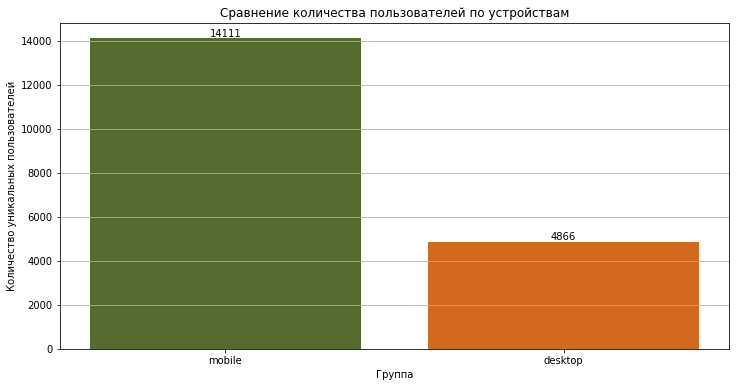

In [60]:
#строим столбчатую диаграмму по количеству пользователей в группах
plt.figure(figsize=(12, 6))

groups = ['mobile', 'desktop']
values = [mobile_users, desktop_users]

for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.bar(groups, values, color=['#556B2F', '#D2691E'])
plt.title('Сравнение количества пользователей по устройствам')
plt.xlabel('Группа')
plt.ylabel('Количество уникальных пользователей')
plt.grid(axis = 'y')
plt.show()

Видим, что наши данные содержат неравномерное распределение между устройствами: со стационарных устройств покупает существенно меньше пользователей (почти втрое). Это не помешает нам проверить гипотезу, но предварительно нужно проверить группы на независимость и нормальное распределение. 

In [61]:
#проверяем пересечение множеств
intersection = set(mobile['user_id'].unique()) & set(desktop['user_id'].unique())

print(f"Пользователи, попавшие в обе группы: {len(intersection)}")

Пользователи, попавшие в обе группы: 3236


⚠️ Ой-ой... Пользователи, делающие заказы с мобильных и десктопов, сильно пересекаются. Для корректности теста нам нужны непересекающиеся множества, поэтому придется удалить пересекающихся пользователей. Это очень сильно понизит количество данных в выборке, но зато будет гарантировать корректность теста, хоть и с  пониженной мощностью из-за малого числа пользователей в одной из групп.

In [62]:
#удаляем пересекающихся пользователей 
mobile_clean = mobile[~mobile['user_id'].isin(intersection)]
desktop_clean = desktop[~desktop['user_id'].isin(intersection)]

In [63]:
#проверяем пересечение множеств после очистки
intersection = set(mobile_clean['user_id'].unique()) & set(desktop_clean['user_id'].unique())

print(f"Пользователи, попавшие в обе группы: {len(intersection)}")

Пользователи, попавшие в обе группы: 0


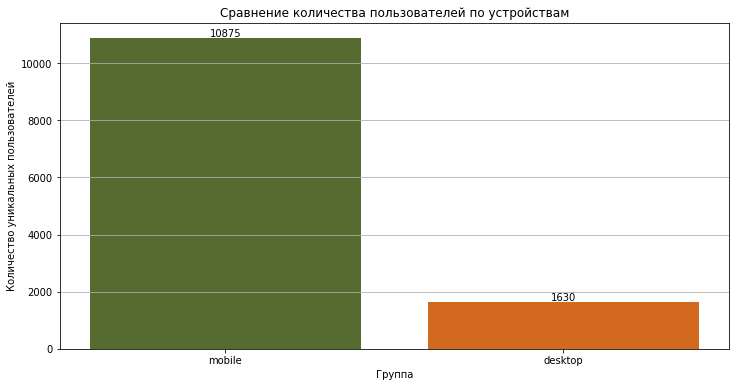

In [64]:
#строим столбчатую диаграмму по количеству пользователей в группах
plt.figure(figsize=(12, 6))

groups = ['mobile', 'desktop']
values = [mobile_clean['user_id'].nunique(), desktop_clean['user_id'].nunique()]

for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.bar(groups, values, color=['#556B2F', '#D2691E'])
plt.title('Сравнение количества пользователей по устройствам')
plt.xlabel('Группа')
plt.ylabel('Количество уникальных пользователей')
plt.grid(axis = 'y')
plt.show()

Неравномерность в размере групп стала еще больше, но выборки независимы. 

Сформулируем гипотезы: 

**H0: Среднее количество заказов на одного пользователя не больше для мобильного приложения и стационарных устройств.**

**Н1: Среднее количество заказов на одного пользователя больше для мобильного приложения, чем для стационарных устройств.**

Создадим метрики, необходимые для проверки гипотезы.

In [65]:
#группируем количество заказов по пользователям для мобильных и десктопных заказов
mobile_orders = mobile_clean.groupby('user_id')['order_id'].count()
desktop_orders = desktop_clean.groupby('user_id')['order_id'].count()

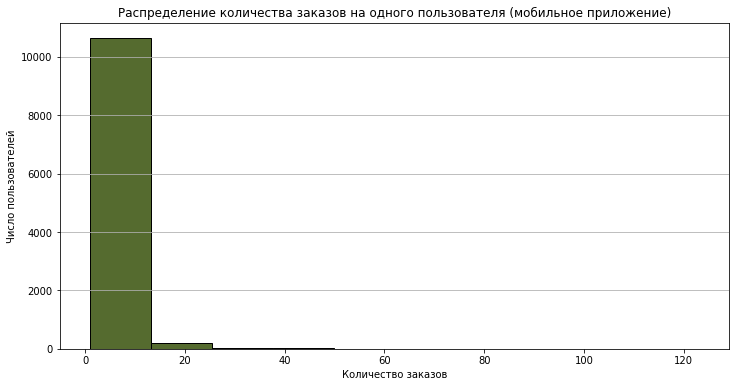

In [66]:
#строим гистограмму распределения
plt.figure(figsize=(12, 6))
plt.hist(mobile_orders, bins=10, color='#556B2F', edgecolor='black')
plt.title('Распределение количества заказов на одного пользователя (мобильное приложение)')
plt.xlabel('Количество заказов')
plt.ylabel('Число пользователей')
plt.grid(axis='y')
plt.show()

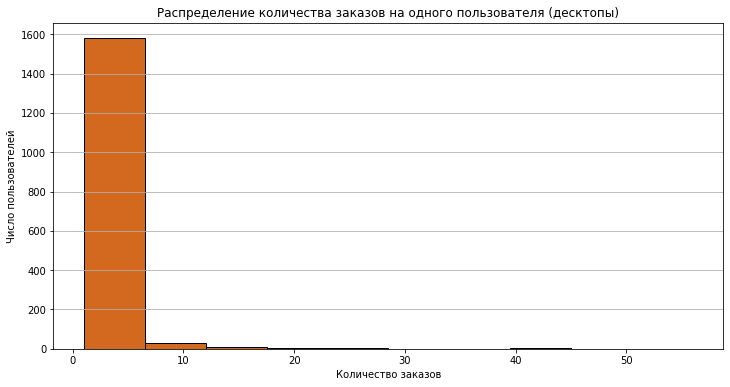

In [67]:
#строим гистограмму распределения
plt.figure(figsize=(12, 6))
plt.hist(desktop_orders, bins=10, color='#D2691E', edgecolor='black')
plt.title('Распределение количества заказов на одного пользователя (десктопы)')
plt.xlabel('Количество заказов')
plt.ylabel('Число пользователей')
plt.grid(axis='y')
plt.show()

Оба распределения пользователей сильно скошены вправо, не являются нормальными распределениями и имеют выбросы. Основная масса значений находится в интервале в от 0 до 10 заказов. С увеличением количества заказов количество пользователей резко падает. Наблюдаются редкие случаи большого количества заказов (40-50), что является выбросом. 

По результатам изучения данных было выявлено, **что выборки содержат выбросы и не подлежат нормальному распределению**, а значит, для проверки гипотезы будем использовать непараметрический тест Манна-Уитни.

In [68]:
# на каком уровне значимости проверяем гипотезу о равенстве распределений
alpha = 0.05 

mobile_orders = mobile_clean.groupby('user_id')['order_id'].count()
desktop_orders = desktop_clean.groupby('user_id')['order_id'].count()

# применяем тест Манна — Уитни
stat_mw, p_value_mw = mannwhitneyu(
    mobile_orders, 
    desktop_orders, 
    alternative='greater' 
) 

if p_value_mw > alpha:
    print(f'pvalue={p_value_mw} > {alpha}')
    print('Нулевая гипотеза находит подтверждение!')
else:
    print(f'pvalue={p_value_mw} < {alpha}')
    print('Нулевая гипотеза не находит подтверждения!')

pvalue=3.0044708534596875e-40 < 0.05
Нулевая гипотеза не находит подтверждения!


По результатам проведенного теста есть основания полагать, что среднее количество заказов на одного пользователя **действительно больше для мобильного приложения**, чем для стационарных устройств.

### Проверка гипотезы о разницы среднего времени между заказами пользователей мобильного приложения и стационарных устройств.

Среднее время между заказами хранится в столбце `days_since_prev`, который содержит пропуски данных. Для проверки гипотезы удалим пропуски:

In [69]:
#считаем пропуски в датасете
mobile_clean['days_since_prev'].isna().sum()

6631

In [70]:
#считаем пропуски в датасете
desktop_clean['days_since_prev'].isna().sum()

1122

In [71]:
#удаляем пропуски
mobile_clean = mobile_clean.dropna(subset=['days_since_prev'])
desktop_clean = desktop_clean.dropna(subset=['days_since_prev'])

Сформулируем гипотезы:

**H0: Среднее время между заказами не больше для мобильного приложения и стационарных устройств.**

**Н1: Среднее время между заказами больше для мобильного приложения, чем для стационарных устройств.**


Создадим метрики, необходимые для проверки гипотезы.

In [72]:
#считаем среднее время между заказами с группировкой по пользователям для мобильных и десктопов 
mobile_days_since_prev = mobile_clean.groupby('user_id')['days_since_prev'].mean()
desktop_days_since_prev = desktop_clean.groupby('user_id')['days_since_prev'].mean()

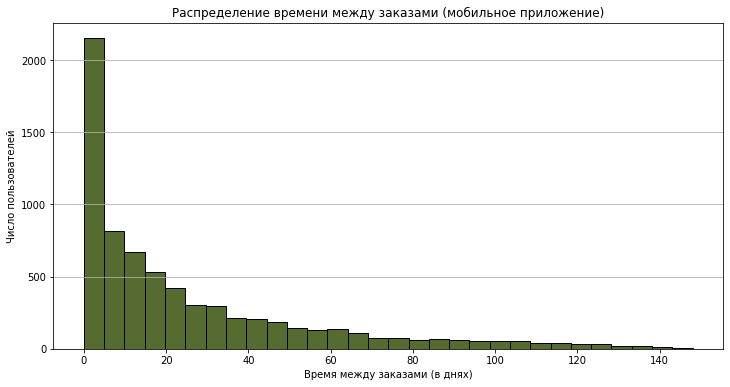

In [73]:
#строим гистограмму распределения
plt.figure(figsize=(12, 6))
plt.hist(mobile_days_since_prev, bins=30, color='#556B2F', edgecolor='black')
plt.title('Распределение времени между заказами (мобильное приложение)')
plt.xlabel('Время между заказами (в днях)')
plt.ylabel('Число пользователей')
plt.grid(axis='y')
plt.show()

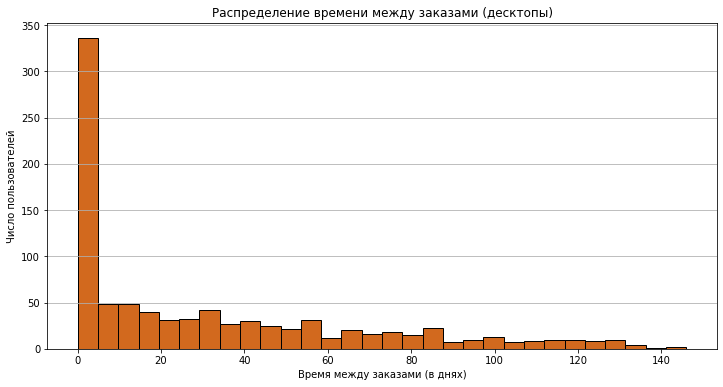

In [74]:
#строим гистограмму распределения
plt.figure(figsize=(12, 6))
plt.hist(desktop_days_since_prev, bins=30, color='#D2691E', edgecolor='black')
plt.title('Распределение времени между заказами (десктопы)')
plt.xlabel('Время между заказами (в днях)')
plt.ylabel('Число пользователей')
plt.grid(axis='y')
plt.show()

Для проверки этой гипотезы так же подходит тест Манна–Уитни, так как:

* в данных присутствуют выбросы (длинный хвост в правой части вплоть до 140+ дней)

* распределение данных не является нормальным (распределение сильно скошено вправо, асимметричное, с длинным хвостом. Большинство пользователей совершают повторные заказы в течение нескольких дней, но встречаются случаи с интервалами в десятки и даже сотни дней)

* сравниваются независимые выборки (мобильные и десктоп-пользователи).


In [75]:
#на каком уровне значимости проверяем гипотезу о равенстве распределений
alpha = 0.05 

mobile_days_since_prev = mobile_clean.groupby('user_id')['days_since_prev'].mean()
desktop_days_since_prev = desktop_clean.groupby('user_id')['days_since_prev'].mean()

#применяем тест Манна — Уитни
stat_mw, p_value_mw = mannwhitneyu(
    mobile_days_since_prev, 
    desktop_days_since_prev, 
    alternative='greater' 
) 

if p_value_mw > alpha:
    print(f'pvalue={p_value_mw} > {alpha}')
    print('Нулевая гипотеза находит подтверждение!')
else:
    print(f'pvalue={p_value_mw} < {alpha}')
    print('Нулевая гипотеза не находит подтверждения!')

pvalue=0.8124986625766982 > 0.05
Нулевая гипотеза находит подтверждение!


По результатам теста нет оснований отвергать нулевую гипотезу, поэтому среднее время между заказами **не отличается** для мобильного приложения и стационарных устройств

## Общий вывод и рекомендации

Для анализа были использованы данные о бронированиях билетов на сервисе Яндекс Афиша за период с 1 июня по 30 октября 2024 года. В датасет вошли данные о заказах, пользователях, устройствах, партнёрах, типах мероприятий и выручке.

**Основные результаты анализа**

**Сезонные изменения**

Осенью количество заказов существенно выросло по сравнению с летом. Произошло перераспределение спроса по типам мероприятий:

* Осенью увеличился интерес к театру и спорту.

* Снизилась доля заказов на концерты, стендапы и мероприятия из категории «другое».

* Увеличился спрос на мероприятия с детским возрастным ограничением (0+, 6+, 12+), что может говорить о смещении в сторону семейного досуга.

* Средняя стоимость билета осенью снизилась в большинстве категорий, вероятно из-за популярности более доступных семейных мероприятий.

**Анализ пользовательской активности (осень 2024):**

* Общее количество заказов и число активных пользователей постоянно росло в течение осени.
* DAU вырос: с ~700 до ~1000-1200.
* Среднее число заказов на пользователя стабильно (около 3), с лёгким ростом.
* Средняя выручка с одного билета показывала снижение к концу периода.
* Обнаружена недельная цикличность: максимум активности — в будни, особенно во вторник и четверг; минимум — в воскресенье.

**Популярные события и партнёры** 

На топ-5 партнёров и регионов приходится более 50% всех заказов.

**Результаты проверки гипотез** 

✅ Среднее количество заказов на пользователя выше у мобильных пользователей — гипотеза подтверждена.

❌ Среднее время между заказами не отличается между мобильными и десктоп-пользователями — нулевая гипотеза не отвергнута, различий нет.

**Рекомендации** 

* Учитывать сезонные предпочтения пользователей: осенью активно развивать театральные и спортивные мероприятия, а также семейные форматы.

* Оптимизировать ценообразование: снижение выручки при росте заказов говорит о необходимости анализа акций и скидок.

* Учитывать недельную цикличность в маркетинговых активностях — активнее продвигать события в начале недели, особенно во вторник и четверг
* Укреплять партнёрство с сервисами, демонстрирующими высокую эффективность (лидеры по доле заказов и выручки одновременно).

* Продолжить анализ различий между пользователями мобильных и стационарных устройств — мобильные дают больше заказов, возможно, стоит оптимизировать UX под них.
